In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split


# Seaborn default configuration
sns.set_style("darkgrid")

# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

# filter all warnings
warnings.filterwarnings('ignore') 

# set max column to 999 for displaying in pandas
pd.options.display.max_columns=999 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris_features = iris.feature_names

In [6]:
data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['Species'])
data=pd.concat([data,df_labels],axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


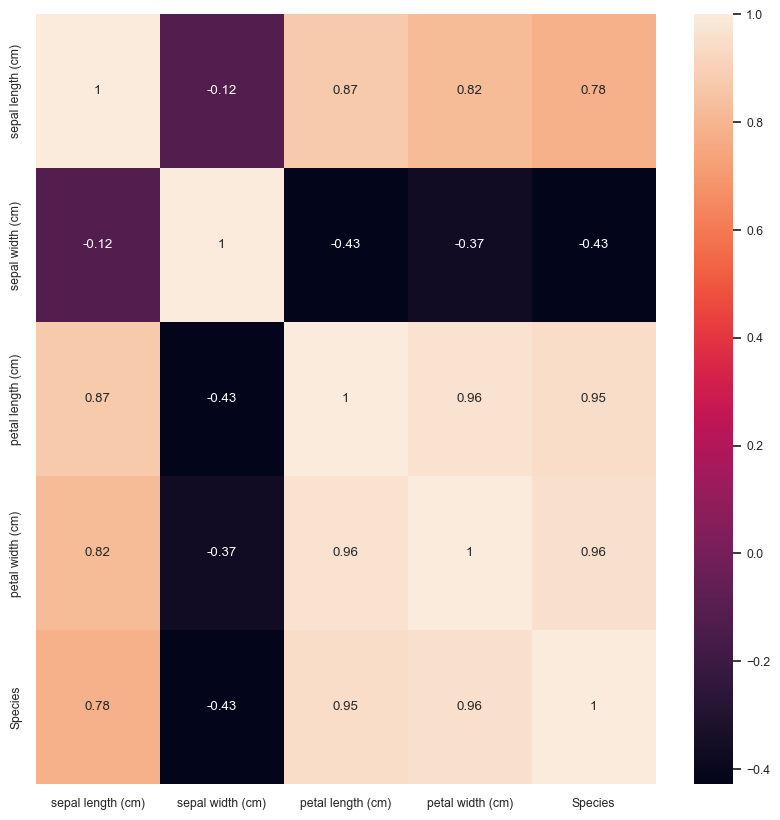

In [7]:
df_corr = data.corr()
plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = True)
plt.show()

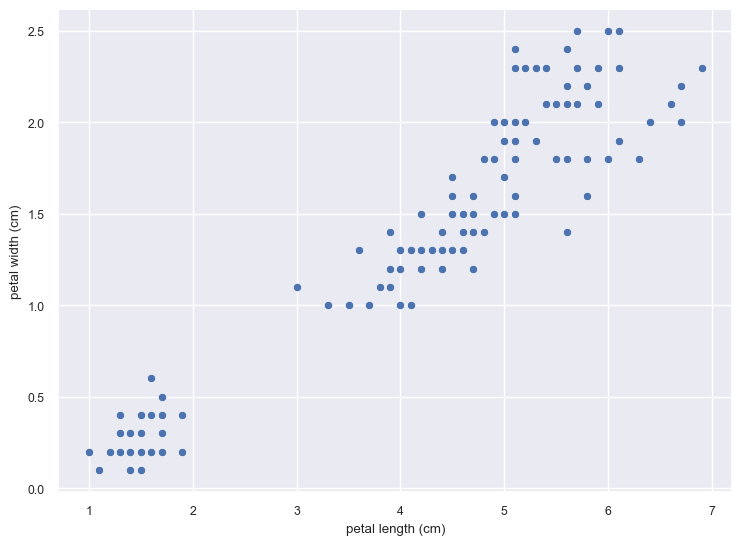

In [8]:
sns.scatterplot(x='petal length (cm)', y = 'petal width (cm)', data = data)
plt.show()

In [9]:
data = data.drop(['Species'], axis = 1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X_data = data.drop(['petal width (cm)'], axis = 1)
y_data = data['petal width (cm)']

In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 3), (30, 3), (120,), (30,))

In [17]:
X_train.shape[1]

3

In [18]:
X_train= X_train.to_numpy()
X_test = X_test.to_numpy()

In [23]:
#Defining the model 
from keras import Input
from keras.models import Model
from keras.optimizers import SGD, Adam

from keras.models import Sequential
from keras.layers import Dense

inputs = Input(shape = (3,))

x = Dense(10,activation='relu')(inputs)
x2 = Dense(8,activation='relu')(x)
x3 = Dense(6, activation = 'relu')(x2)
outputs = Dense(1)(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = "rmsprop",
             loss = "mse",metrics=["mae"]
             )

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 10)                40        
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [24]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 2.6061 - mae: 1.3920 - val_loss: 1.7533 - val_mae: 1.1295
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.7334 - mae: 1.1156 - val_loss: 1.2283 - val_mae: 0.9266
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 1.2465 - mae: 0.9273 - val_loss: 0.8781 - val_mae: 0.7690
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8999 - mae: 0.7747 - val_loss: 0.6090 - val_mae: 0.6223
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6319 - mae: 0.6405 - val_loss: 0.4103 - val_mae: 0.5046
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4316 - mae: 0.5176 - val_loss: 0.2689 - val_mae: 0.4054
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2881 - mae: 0.4221 - val_loss: 0.1743 - val_mae: 0.3177
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1900 - mae: 0.33

4/4 [==============================] - 0s 16ms/step - loss: 0.0344 - mae: 0.1406 - val_loss: 0.0454 - val_mae: 0.1725
Epoch 64/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0370 - mae: 0.1424 - val_loss: 0.0505 - val_mae: 0.1871
Epoch 65/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0345 - mae: 0.1424 - val_loss: 0.0515 - val_mae: 0.1879
Epoch 66/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0337 - mae: 0.1404 - val_loss: 0.0437 - val_mae: 0.1470
Epoch 67/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0367 - mae: 0.1408 - val_loss: 0.0644 - val_mae: 0.2093
Epoch 68/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0355 - mae: 0.1462 - val_loss: 0.0505 - val_mae: 0.1863
Epoch 69/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0345 - mae: 0.1415 - val_loss: 0.0476 - val_mae: 0.1788
Epoch 70/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0349 - mae: 0.1405 - 

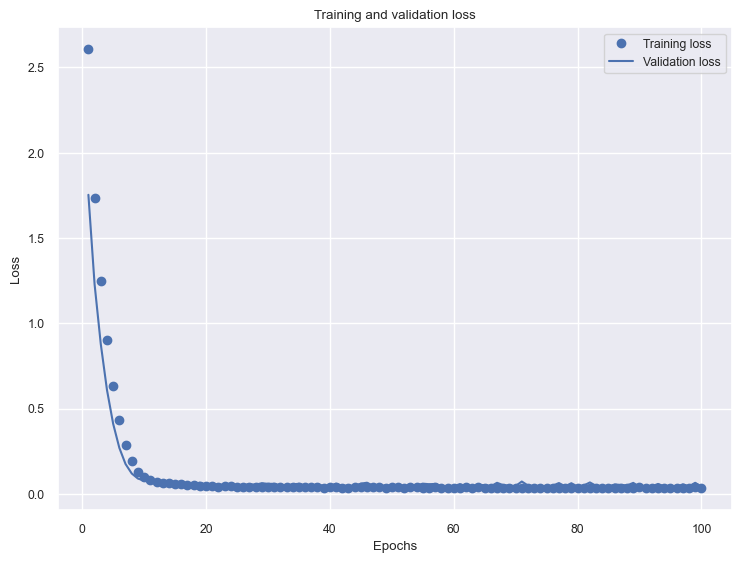

In [25]:
history_dict = history.history
mae = history_dict['mae']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [26]:
y_pred , y_test

(array([[1.5872535 ],
        [2.2626476 ],
        [0.23077433],
        [1.9548898 ],
        [0.2804116 ],
        [1.5444865 ],
        [1.7495669 ],
        [1.7564633 ],
        [1.6193417 ],
        [2.0435345 ],
        [1.3763958 ],
        [1.5127028 ],
        [1.6192278 ],
        [0.23532067],
        [0.2419778 ],
        [1.2247564 ],
        [0.19994752],
        [1.1702663 ],
        [1.7096595 ],
        [0.24251376],
        [0.24378277],
        [0.22166795],
        [1.8703164 ],
        [1.5622567 ],
        [0.20663758],
        [2.0703726 ],
        [1.9165839 ],
        [1.5716567 ],
        [0.2500453 ],
        [0.2160496 ]], dtype=float32),
 72     1.5
 131    2.0
 10     0.2
 140    2.4
 24     0.2
 86     1.5
 133    1.5
 83     1.6
 52     1.5
 136    2.4
 74     1.3
 50     1.4
 146    1.9
 30     0.2
 11     0.2
 62     1.0
 2      0.2
 81     1.0
 127    1.8
 43     0.6
 15     0.4
 34     0.2
 134    1.4
 91     1.4
 1      0.2
 143    2.3
 116    1.8

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss = "mse",metrics=["mae"])
    return model

In [28]:
import numpy as np 
k = 3
num_val_samples = len(X_train) //4
# 나눗셈의 몫 – 404//4 → 101
num_epochs = 500
all_mae_histories = []
for i in range(k): # i = 0,1,2
    print('processing fold #', i)
    X_val= X_train[i * num_val_samples: (i + 1) * num_val_samples] 
    y_val = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( [X_train[:i* num_val_samples],
        X_train[(i + 1) * num_val_samples:]]
        , axis=0) 
    partial_train_targets = np.concatenate( [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]]
        , axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(X_val, y_val),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2


In [100]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

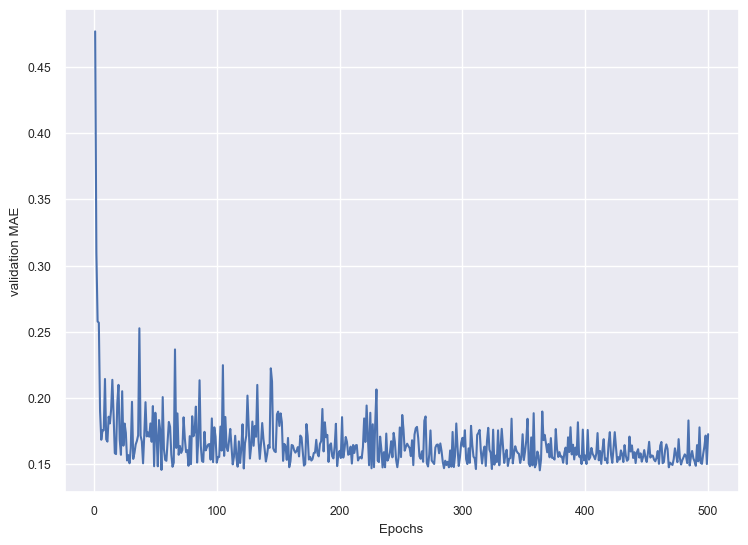

In [101]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history )
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()